# Part B:  DIABETES DATA PROJECT - Wendy Wong

### 1. Cluster Analysis
### 2. Decision Trees
### 3.  Random Forests


#### Import Modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn import datasets
import statsmodels.formula.api as smf
import matplotlib.cm as cm
import statsmodels.api as sm

# Show plots inside a notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Read the data into a Pandas DataFrame
# Load Dataframe from  csv file

diabetic_data = pd.read_csv('diabetic_data.csv')
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Data Pre-Processing 

#### Handling Missing values

### Create a new dataframe ( with Columns of Interest)

In [3]:
# Drop columns with missing values 'na' as we do not want to impute them
diabetic_data.dropna()  

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Create a New dataframe and get only admission_type_id, diabetesMed,race, gender, age,number_diagnoses,num_procedures, race, num_medications, time_in_hospital,'insulin','readmitted', 'admission_source_id'
diabetic_data = diabetic_data[['admission_type_id','number_diagnoses','num_procedures','admission_source_id', 'readmitted','diabetesMed','race','number_outpatient','num_lab_procedures','gender','age','num_medications','number_inpatient','number_emergency','time_in_hospital','insulin']]

#### Prepare the dataset

In [5]:
X = diabetic_data['diabetesMed'].values
X = X[:, np.newaxis]
X.shape

(101766, 1)

In [6]:
y = diabetic_data['readmitted'].values
y.shape

(101766,)

## Class label encoding - Transform categorical variables for Machine Learning

In [7]:
## Encode class labels

from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
l_encoder.fit(y)
l_encoder.classes_

array(['<30', '>30', 'NO'], dtype=object)

In [8]:
y_enc = l_encoder.transform(y)
np.unique(y_enc)

array([0, 1, 2])

In [9]:
np.unique(l_encoder.inverse_transform(y_enc))

array(['<30', '>30', 'NO'], dtype=object)

In [10]:
X = diabetic_data.iloc[:, :16].values 
y = diabetic_data['readmitted'].values
np.unique(y)

array(['<30', '>30', 'NO'], dtype=object)

In [11]:
# Use Scikit-learn estimators for classification convert labels to integers internally
# we enumerate the class labels starting at 0:

import numpy as np
race_mapping = {label:idx for idx,label in
                enumerate(np.unique(diabetic_data['race']))}
race_mapping
{'?':0,'Caucasian':1,'AfricanAmerican':2,'Other':3,'Hispanic':4,'Asian':5}

gender_mapping = {label:idx for idx,label in
                enumerate(np.unique(diabetic_data['gender']))}
gender_mapping
{'Male':0,'Female':1,'Unknown/Invalid':2}

age_mapping = {label:idx for idx,label in
                enumerate(np.unique(diabetic_data['age']))}
age_mapping
{'[0-10)':0,'[10-20)':1,'[20-30)':2,'[30-40)':3,'[40-50)':4,'[50-60)':5,'[60-70)':5,'[70-80)':7,'[80-90)':8,'[90-100)':9}

insulin_mapping = {label:idx for idx,label in
                enumerate(np.unique(diabetic_data['insulin']))}
insulin_mapping
{'No':0,'Steady':1,'Up':2,'Down':3}

diabetesMed_mapping = {label:idx for idx,label in
                enumerate(np.unique(diabetic_data['diabetesMed']))}
diabetesMed_mapping
{'No':0,'Yes':1}

readmitted_mapping = {label:idx for idx,label in
                enumerate(np.unique(diabetic_data['readmitted']))}
readmitted_mapping
{'NO':0,'>30':1,'<30':2}

{'<30': 2, '>30': 1, 'NO': 0}

In [12]:
diabetic_data['gender'] = diabetic_data['gender'].map(gender_mapping)
diabetic_data['diabetesMed'] = diabetic_data['diabetesMed'].map(diabetesMed_mapping)
diabetic_data['age'] = diabetic_data['age'].map(age_mapping)
diabetic_data['race'] = diabetic_data['race'].map(race_mapping)
diabetic_data['insulin'] = diabetic_data['insulin'].map(insulin_mapping)
diabetic_data['readmitted'] = diabetic_data['readmitted'].map(readmitted_mapping)
diabetic_data.head()
diabetic_data.shape  # check number of features remaining in the dataset

(101766, 16)

### Remove any duplicate records

In [13]:
# Remove any duplicate records  and count how many records
diabetic_data_no_duplicates = diabetic_data.drop_duplicates()

In [14]:
# Get the dimensions of the dataframe
diabetic_data.shape
diabetic_data_no_duplicates.shape

(101720, 16)

In [15]:
# Examining the data type of the Diabetic data 
diabetic_data.dtypes            # data types of each column

admission_type_id      int64
number_diagnoses       int64
num_procedures         int64
admission_source_id    int64
readmitted             int64
diabetesMed            int64
race                   int64
number_outpatient      int64
num_lab_procedures     int64
gender                 int64
age                    int64
num_medications        int64
number_inpatient       int64
number_emergency       int64
time_in_hospital       int64
insulin                int64
dtype: object

### Save pre-processed data as a separate file and work with this file from now on

In [16]:
diabetic_data.to_csv('diabetic_data_clean.csv',index=False)
diabetes3 = pd.read_csv('diabetic_data_clean.csv')

# 6 Clustering - K-means clustering 
(to find patterns in unstructured data)
#### grouping to find similarity

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn import cluster, datasets

In [18]:
# Read the Diabetic dataset

# Read diabetic_data.csv into a Dataframe called 'diabetes'
diabetes = pd.read_table('diabetic_data.csv', sep=',')
diabetes = pd.read_csv('diabetic_data.csv')

In [19]:
# Load and import dataset
diabetes = datasets.load_diabetes()
d = diabetes.data
np.random.seed(0)

AttributeError: feature_names

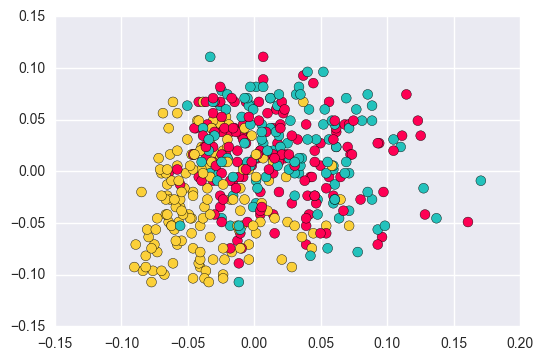

In [20]:
# Run KMeans using 3 clusters

est = KMeans(n_clusters=3, init='random')
est.fit(d)
y_kmeans = est.predict(d)

colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.figure()
plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50)
plt.xlabel(diabetes.feature_names[2])
plt.ylabel(diabetes.feature_names[0])

In [91]:
# Find centers

#centers = est.cluster_centers_
#plt.figure()
#plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50)
#plt.xlabel(diabetes.feature_names[2])
#plt.ylabel(diabetes.feature_names[0])
#plt.scatter(centers[:, 2], centers[:, 0], c='k', linewidths=3,
            #marker='+', s=300)

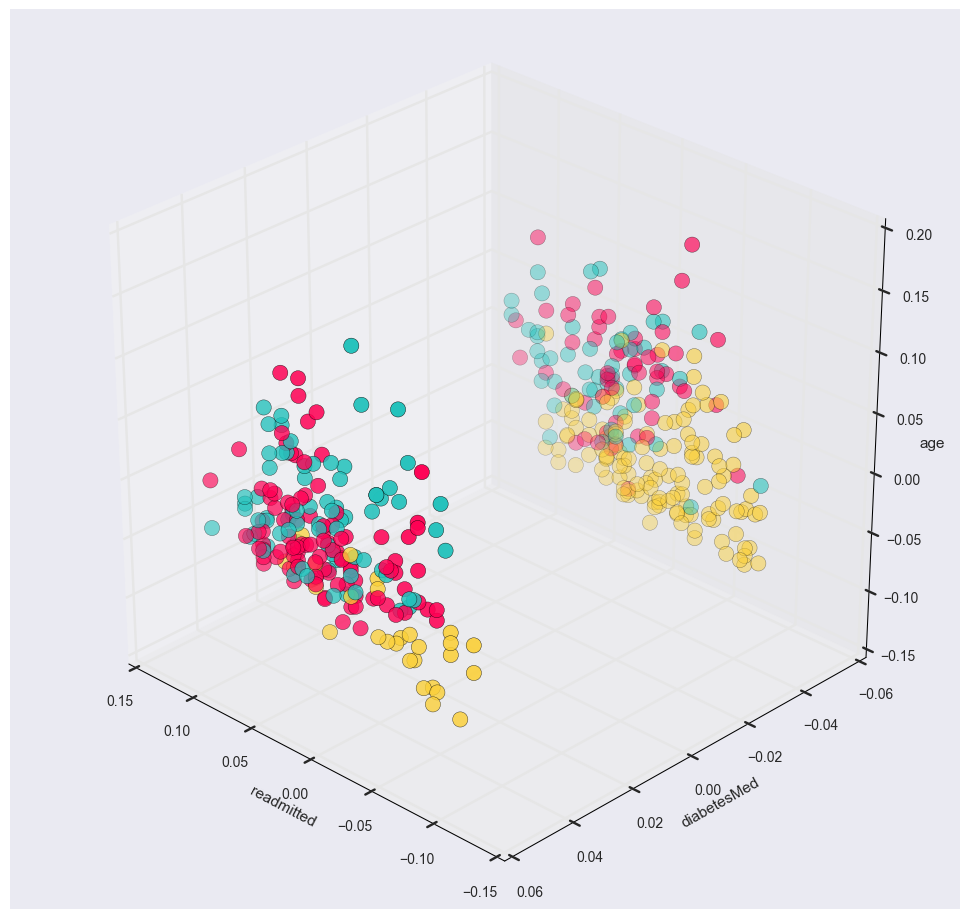

In [21]:
from mpl_toolkits.mplot3d import Axes3D
plt.suptitle('3d plot', fontsize=15)
ax = Axes3D(plt.figure(figsize=(10, 9)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
ax.scatter(d[:,0], d[:,1], d[:,2], c = colors[y_kmeans], s=120)
ax.set_xlabel('readmitted')
ax.set_ylabel('diabetesMed')
ax.set_zlabel('age')
colors = np.array(['#FF0054','#FBD039','#23C2BC'])

## Determing the number of clusters

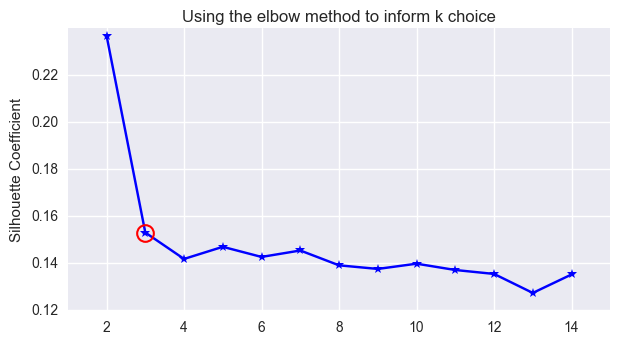

In [22]:
'''
DETERMINING THE NUMBER OF CLUSTERS
How do you choose k? There isn't a bright line, but we can evaluate 
performance metrics such as the silhouette coefficient and within sum of 
squared errors across values of k.

scikit-learn Clustering metrics documentation:
http://scikit-learn.org/stable/modules/classes.html#clustering-metrics
'''

# Create a bunch of different models
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(d) for k in k_rng]

#================================
# Option 1: Silhouette Coefficient
# Generally want SC to be closer to 1, while also minimizing k

from sklearn import metrics
silhouette_scores = [metrics.silhouette_score(d, e.labels_, metric='euclidean') for e in est[1:]]

silhouette_scores

# Plot the results
plt.figure(figsize=(7, 8))
plt.subplot(211)
plt.title('Using the elbow method to inform k choice')
plt.plot(k_rng[1:], silhouette_scores, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.ylabel('Silhouette Coefficient')
plt.plot(3,silhouette_scores[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

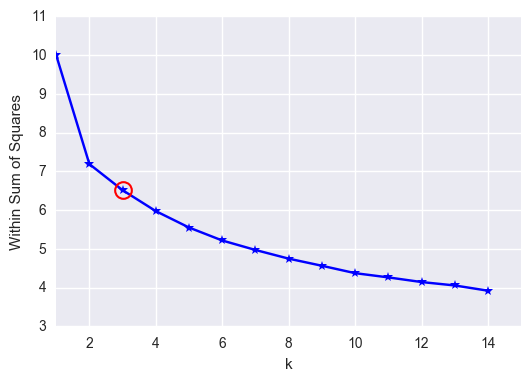

In [23]:
# Generally want to minimize WSS, while also minimizing k

within_sum_squares = [e.inertia_ for e in est]

within_sum_squares

# Plot the results
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Within Sum of Squares')
plt.plot(3,within_sum_squares[2], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


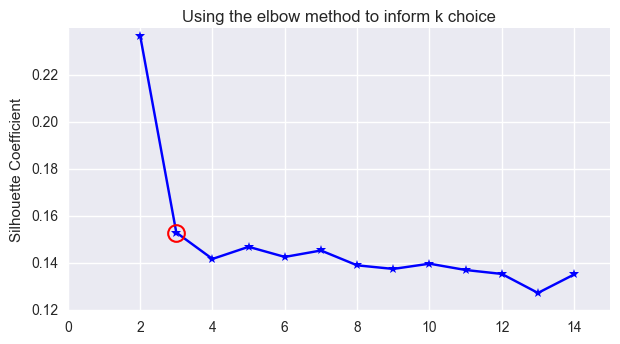

In [24]:
# plot 3 clusters
plt.figure(figsize=(7, 8))
plt.subplot(211)
plt.title('Using the elbow method to inform k choice')
plt.plot(k_rng[1:], silhouette_scores, 'b*-')
plt.xlim([0,15])
plt.grid(True)
plt.ylabel('Silhouette Coefficient')
plt.plot(3,silhouette_scores[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

## Cluster Validation

/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.resh

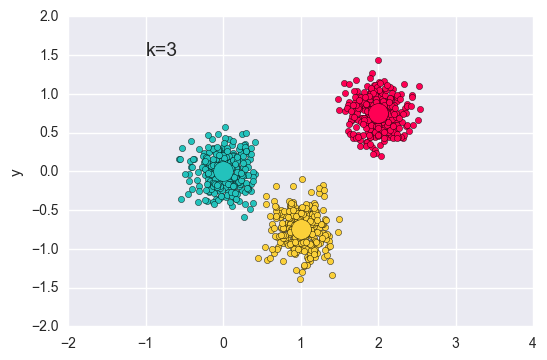

In [96]:
'''
K = 3
'''

# Generate and Plot Dummy Data for k = 3
centres = [[2, 0.75], [1, -0.75], [0, 0]]
X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.2,0.2]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))
colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.text(-1, 1.5, 'k=3', fontsize=14)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.ylabel('y')

### Silhouette score for K=3

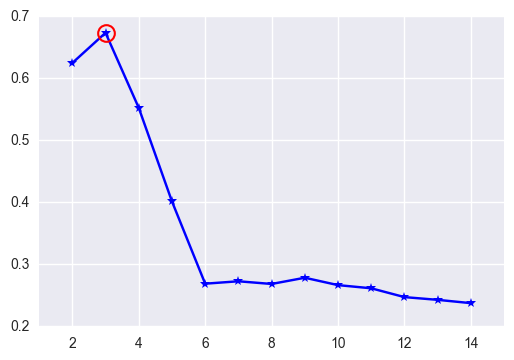

In [97]:
# Calculate Silhouette Scores for k = 3
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.plot(3,silhouette_score[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

### Within Sum of Squares

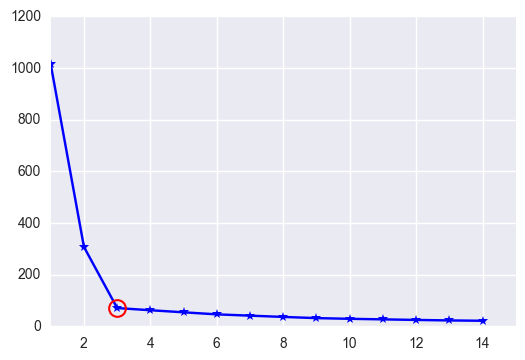

In [79]:
# Calculate the within sum of squared errors for k = 3
within_sum_squares = [e.inertia_ for e in est]
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.plot(3,within_sum_squares[2], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


## K-Means limitations


NOTES ON LIMITATIONS OF K-MEANS CLUSTERING

Adapted from Bart Baddely's 2014 PyData Presentation:
http://nbviewer.ipython.org/github/BartBaddeley/PyDataTalk-2014/blob/master/PyDataTalk.ipynb

Agenda: 
1) K-means might not work when dimensions have different scales
2) K-means might not work for non-spherical shapes
3) K-means might not work for clusters of different sizes


## Computer crashed 5 times to extract cluster info below!!

* Cluster analysis is not suitable for data with wide and varying shapes and densities

In [ ]:
# get info on one cluster
#for cluster_in_question in range(0,4):
    #get center of cluster
    "centroid", diabetic_cluster.cluster_centers_[cluster_in_question]
    # grab diabetesMed in dataframe that belong to this cluster
    #diabetic2 = diabetes3[np.where(y_kmeans == cluster_in_question, True, False)]['admission_type_id']
    # look at top five qualities in cluster
    #print sorted(zip(diabetes3.columns[1:], diabetic_cluster.cluster_centers_[cluster_in_question]), key=lambda x:x[1], reverse=True)[1:6]
    #print
 
#from sklearn import metrics
#metrics.silhouette_score(diabetes3.drop('admission_type_id',axis=1), diabetic_cluster.labels_, metric='euclidean')   


# 7 Decision Trees

## Assessing feature importance for 'readmissions'

* Easy to understand and is a supervised learning technique used for classification (logistic) on categorical data.
* Problem of overfitting
* Low Gini Coefficient is a bad split
*** Non-linear data: scans and splits on a feature that produces the greatest separation between classes in the resulting nodes.
* Classification tree: predict that  each observation belongs to the most commonly  occurring class of training  observations
- select features that would predict - readmissions for diabetes patients.

####  16 Variables 
###### (Transformed and Cleaned from original 50 variables):
*admissions_type_id:1=Emergency 2=Urgent 3=Elective 4=Newborn 5=Not Available 6=NULL 7=Trauma Center 8=Not Mapped
*gender: Female =1,Male =0, Unknown/Invalid = 2
*race: ? =0,Caucasian=1,AfricanAmerican = 2,Other = 3,Hispanic =4, Asian =5
*insulin: Steady=0,Up=1,Down=2
*readmitted: NO = 0,>30=1,<30=2
*age: [0-10)=0,[10-20)=1,[20-30)=2,[30-40)=3,[40-50)=4,[50-60)=5,[60-70)=6,[70-80)=7,[80-90)=8,[90-100)=9
*diabetedMed: No=0, Yes =1
*num_medications: integer
*number_diagnoses:integer
*time_in_hospital: integer
*num_procedures: integer
*num_lab_procedures: integer
*admission_source_id: integer
*number_emergency: integer
*number_inpatient
*number_outpatient

### Classification - Decision Trees

In [26]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
# Read the transformed and cleaned data:

diabetic_data.to_csv('diabetic_data_clean.csv',index=False)
diabetes3 = pd.read_csv('diabetic_data_clean.csv')

In [62]:
# Take  a  selection of the features
d = diabetes3[['admission_type_id','readmitted', 'gender', 'age','diabetesMed', 'race', 'num_medications', 'number_diagnoses', 'time_in_hospital']] 

In [63]:
# Check for missing values in all columns
d.isnull().sum()

admission_type_id    0
readmitted           0
gender               0
age                  0
diabetesMed          0
race                 0
num_medications      0
number_diagnoses     0
time_in_hospital     0
dtype: int64

#### Transformed and cleaned data diabetes3, does not include any missing values or categorical variables that have not been converted into integers.

### Explore 'readmissions'

In [43]:
# Explore the data to identify trends in characteristics of Readmissions                  

In [47]:
d.readmitted.value_counts()             # The readmissions rate for everyone

2    54864
1    35545
0    11357
Name: readmitted, dtype: int64

In [48]:
# readmissions by 'gender' and 'diabetesMed'
d.groupby(['gender', 'diabetesMed']).readmitted.count()   # males with diabetes med 41,787

gender  diabetesMed
0       0              12921
        1              41787
1       0              10481
        1              36574
2       0                  1
        1                  2
Name: readmitted, dtype: int64

In [53]:
# readmission rates by 'race' and 'diabetesMed':
d.groupby(['race','diabetesMed']).readmitted.count()             #'Other race'  have highest diabetes medication 58,450

race  diabetesMed
0     0                402
      1               1871
1     0               4412
      1              14798
2     0                166
      1                475
3     0              17649
      1              58450
4     0                486
      1               1551
5     0                288
      1               1218
Name: readmitted, dtype: int64

In [55]:
# How many people readmitted or not readmitted by 'age'
d.groupby(['age', 'diabetesMed','gender']).readmitted.count() # By age: 70 to 80 y.o females at 10,775

age  diabetesMed  gender
0    0            0            12
                  1            16
     1            0            71
                  1            62
1    0            0            52
                  1            39
     1            0           350
                  1           250
2    0            0           251
                  1            91
     1            0           863
                  1           452
3    0            0           577
                  1           349
     1            0          1585
                  1          1264
4    0            0          1205
                  1          1075
     1            0          3606
                  1          3799
5    0            0          1907
                  1          1948
     1            0          6665
                  1          6736
6    0            0          2419
                  1          2452
                  2             1
     1            0          8642
                  1    

## Key Insight:  demographic attributes for diabetic patients with readmissions

In [56]:
# How many people readmitted or not readmitted by 'age'
d.groupby(['age', 'diabetesMed','gender','race']).readmitted.count() 

# 1.(80-90), 'Other' race group, female will  be readmitted for diabetes 4450
# 2.(90-100), 'Other' race group, female will  be readmitted for diabetes 501

age  diabetesMed  gender  race
0    0            0       0          1
                          1          1
                          3          9
                          4          1
                  1       1          1
                          3         14
                          5          1
     1            0       1          7
                          2          1
                          3         62
                          4          1
                  1       1          7
                          2          1
                          3         51
                          5          3
1    0            0       1         14
                          3         36
                          4          2
                  1       1         12
                          3         24
                          4          2
                          5          1
     1            0       0          3
                          1        116
                          2      

## Key Insight 2: emergency readmissions

In [67]:
# How many people readmitted or not readmitted by 'age'
d.groupby(['admission_type_id','age','diabetesMed','gender','race',]).readmitted.count() 

#1.  132: age (10 to 20) female, 'other' race group will be readmitted into hospital as an emergency who is a diabetes patient
#2. 32: age (0to 10) female, 'other' race group will be readmitted into hospital as an emergency patient with diabetes
#3. 41: age (10 to 20) male, 'other' race group will be readmitted into hospital as an emergency patient with diabetes

admission_type_id  age  diabetesMed  gender  race
1                  0    0            0       3         6
                                     1       3         8
                                             5         1
                        1            0       1         6
                                             2         1
                                             3        41
                                             4         1
                                     1       1         6
                                             2         1
                                             3        32
                                             5         2
                   1    0            0       1         9
                                             3        20
                                     1       1         5
                                             3        16
                                             4         2
                                      

In [71]:
readmitted =d['readmitted']
del d['readmitted']

#### Train and Test Split

In [72]:
# Now, split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(d,readmitted, random_state=1)

In [73]:
# Create a decision tree classifier object (start out with a small tree for interpretability)
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Fit the decision tree classifier
ctree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [74]:
# How to interpret the diagram?
ctree.classes_

array([0, 1, 2])

In [79]:
#%load confusion_matrix_nice.py
#from confusion_matrix_nice import plot_confusion_matrix
%run confusion_matrix_nice

ERROR:root:File `u'confusion_matrix_nice.py'` not found.


In [84]:
y_pred_class = ctree.predict(X_test)

In [111]:
# get the predictions (not the probabilities)
#y_pred_class = ctree.predict(X_test)

# plot an attractive confusion matrix
#cnf_mat = metrics.confusion_matrix(y_test, y_pred_class, labels = diabetes3.readmitted.unique())
#class_labels = diabetes3.readmitted.unique()
#plt.figure()
#plot_confusion_matrix(cnf_mat, class_labels,
                          #normalize=False,
                          #title='Confusion matrix',
                          #cmap=plt.cm.Blues)
#plt.show()

### Use model

In [86]:
# Create a feature vector for reference. We will create fictional values for test observations. 
features = X_train.columns.tolist()

features

['admission_type_id',
 'gender',
 'age',
 'diabetesMed',
 'race',
 'num_medications',
 'number_diagnoses',
 'time_in_hospital']

In [87]:
features

['admission_type_id',
 'gender',
 'age',
 'diabetesMed',
 'race',
 'num_medications',
 'number_diagnoses',
 'time_in_hospital']

## Feature Importance

In [88]:
# Which features are the most important?
ctree.feature_importances_

# 'number_diagnoses' is the feature with highest score at 0.73871724

array([ 0.0652289 ,  0.        ,  0.        ,  0.19605386,  0.        ,
        0.        ,  0.73871724,  0.        ])

## Rank by Feature Importance

In [89]:
# create a dataframe in a list with the features and the ranking in highest ranking
pd.DataFrame(zip(features, ctree.feature_importances_)).sort_index(by=1, ascending=False)

/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,0,1
6,number_diagnoses,0.738717
3,diabetesMed,0.196054
0,admission_type_id,0.065229
1,gender,0.000000
2,age,0.000000
4,race,0.000000
5,num_medications,0.000000
7,time_in_hospital,0.000000


In [90]:
# Make predictions on the test set
preds = ctree.predict(X_test)

### Model accuracy

In [91]:
# Calculate accuracy
metrics.accuracy_score(y_test, preds)

0.54343212011634301

### Confusion Matrix

In [92]:
# Confusion matrix
pd.crosstab(y_test, preds, rownames=['actual'], colnames=['predicted'])

predicted,2
actual,
0,2757
1,8859
2,13826


In [93]:
# Make predictions on the test set using predict_proba
probs = ctree.predict_proba(X_test)[:,1]

### Calculate the AUC metric - not supported by multi-class
** metrics.roc_auc_score(y_test, probs)

In [104]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# compare AUC using cross-validation
#from sklearn.cross_validation import cross_val_score
#cross_val_score(logreg, d, readmitted cv=10, scoring='roc_auc').mean()
#cross_val_score(ctree, d, readmitted, cv=10, scoring='roc_auc').mean()


# Does not support multi-class

In [107]:
from sklearn.grid_search import GridSearchCV

# check CV score for max depth = 3
#ctree = tree.DecisionTreeClassifier(max_depth=3)
#np.mean(cross_val_score(ctree, d, readmitted, cv=5, scoring='roc_auc'))

# check CV score for max depth = 10
#ctree = tree.DecisionTreeClassifier(max_depth=10)
#np.mean(cross_val_score(ctree, d, readmitted, cv=5, scoring='roc_auc'))

# Does not support multi-class

# 8 Random Forests 
### Decision Trees (Enhanced) 
### Ensemble Model:  
* Process of combining several models to solve a prediction problem with the goal of producing  a combined model that is more accurate than any individual model.
* Critieria of success:

1. Models should be accurate
2. Models should be independent (variables are not correlated with one another)

*** Classification problems use majority voting (i.e. manually applied ensemble method)

* Random Forests:a variation of bagged trees has better performance.
Take an ensemble of decision trees using bootstrapped samples of the training set.
- When building each tree, each time a split is considered a random sample of m predictors is chosen as split candidates from the  full set of p predictors.
The split is only allowed to use one of those m predictors
#### m = square root of p (classification)
* Random forests decorrelates  the trees as it  leaves out candidate predictors from each split, the averaging process reduces the variance of the model.
#### Variable importance
For bagged classification trees, a Gini index is calculated
- Each bagged tree used two-thirds of observations, remaining obs are 'out of bag observations'.
- No cross validation or test set approach.
#### Method
- First obserrvation in the training data, predict its response using only 'remaining obs' or out of bag and then take a majority vote for classification
- compute all predictions to actual response in order to compute a classification error(i.e.out of bag error)

# Bagged Trees 
#### every tree makes numeric prediction and predictions are averaged to reduce  variance

In [112]:
import pandas as pd

# read in diabetes3 data
diabetic_data.to_csv('diabetic_data_clean.csv',index=False)
diabetes3 = pd.read_csv('diabetic_data_clean.csv')

In [113]:
# cleaned and transformed diabetes data that has been encoded into integers
diabetes3

,admission_type_id,number_diagnoses,num_procedures,admission_source_id,readmitted,diabetesMed,race,number_outpatient,num_lab_procedures,gender,age,num_medications,number_inpatient,number_emergency,time_in_hospital,insulin
0,6,1,0,1,2,0,3,0,41,0,0,1,0,0,1,1
1,1,9,0,7,1,1,3,0,59,0,1,18,0,0,3,3
2,1,6,5,7,2,1,1,2,11,0,2,13,1,0,2,1
3,1,7,1,7,2,1,3,0,44,1,3,16,0,0,2,3
4,1,5,0,7,2,1,3,0,51,1,4,8,0,0,1,2
5,2,9,6,2,1,1,3,0,31,1,5,16,0,0,3,2
6,3,7,1,2,2,1,3,0,70,1,6,21,0,0,4,2
7,1,8,0,7,1,1,3,0,73,1,7,12,0,0,5,1
8,2,8,2,4,2,1,3,0,68,0,8,28,0,0,13,2
9,3,8,3,4,2,1,3,0,33,0,9,18,0,0,12,2


In [114]:
# calculate the number of rows in diabetes3
n_rows = diabetes3.shape[0]

# set a seed for reproducibility
np.random.seed(123)

# create three bootstrap samples (will be used to select rows from the DataFrame)
sample1 = np.random.choice(a=n_rows, size=n_rows, replace=True)
sample2 = np.random.choice(a=n_rows, size=n_rows, replace=True)
sample3 = np.random.choice(a=n_rows, size=n_rows, replace=True)

# print samples
print sample1
print sample2
print sample3

[15725 28030 17730 ..., 16703 24417 32500]
[10624 23044 25683 ...,  2377 74468 43863]
[36037 97924 59586 ..., 30151 31394 48867]


In [115]:
# use sample1 to select rows from DataFrame
print diabetes3.iloc[sample1, :]

       admission_type_id  number_diagnoses  num_procedures  \
15725                  1                 9               0   
28030                  5                 4               2   
17730                  2                 5               5   
61404                  3                 6               2   
63206                  3                 9               4   
15377                  1                 4               0   
73299                  1                 9               0   
46203                  1                 9               0   
89302                  1                 8               0   
22241                  1                 6               3   
65632                  1                 9               1   
55409                  1                 9               2   
23166                  2                 7               5   
71200                  3                 6               1   
33710                  1                 9               0   
65647   

In [116]:
from sklearn.tree import DecisionTreeRegressor

# grow one regression tree with each bootstrapped training set
treereg1 = DecisionTreeRegressor(random_state=123)
treereg1.fit(diabetes3.iloc[sample1, 1:], diabetes3.iloc[sample1, 0])

treereg2 = DecisionTreeRegressor(random_state=123)
treereg2.fit(diabetes3.iloc[sample2, 1:], diabetes3.iloc[sample2, 0])

treereg3 = DecisionTreeRegressor(random_state=123)
treereg3.fit(diabetes3.iloc[sample3, 1:], diabetes3.iloc[sample3, 0])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=123,
           splitter='best')

In [117]:
# read in out-of-sample data
oos = pd.read_csv('diabetic_data_clean.csv')

# print data
oos

,admission_type_id,number_diagnoses,num_procedures,admission_source_id,readmitted,diabetesMed,race,number_outpatient,num_lab_procedures,gender,age,num_medications,number_inpatient,number_emergency,time_in_hospital,insulin
0,6,1,0,1,2,0,3,0,41,0,0,1,0,0,1,1
1,1,9,0,7,1,1,3,0,59,0,1,18,0,0,3,3
2,1,6,5,7,2,1,1,2,11,0,2,13,1,0,2,1
3,1,7,1,7,2,1,3,0,44,1,3,16,0,0,2,3
4,1,5,0,7,2,1,3,0,51,1,4,8,0,0,1,2
5,2,9,6,2,1,1,3,0,31,1,5,16,0,0,3,2
6,3,7,1,2,2,1,3,0,70,1,6,21,0,0,4,2
7,1,8,0,7,1,1,3,0,73,1,7,12,0,0,5,1
8,2,8,2,4,2,1,3,0,68,0,8,28,0,0,13,2
9,3,8,3,4,2,1,3,0,33,0,9,18,0,0,12,2


In [118]:
# select feature columns (every column except for the 0th column)
feature_cols = diabetes3.columns[1:]

# make predictions on out-of-sample data
preds1 = treereg1.predict(oos[feature_cols])
preds2 = treereg2.predict(oos[feature_cols])
preds3 = treereg3.predict(oos[feature_cols])

# print predictions
print preds1
print preds2
print preds3

[ 6.  1.  1. ...,  2.  1.  1.]
[ 2.  1.  1. ...,  1.  1.  1.]
[ 2.  1.  2. ...,  1.  2.  1.]


In [120]:
# average predictions and compare to actual values
print (preds1 + preds2 + preds3)/3
print oos.readmitted.values

[ 3.33333333  1.          1.33333333 ...,  1.33333333  1.33333333  1.        ]
[2 1 2 ..., 2 2 2]


In [121]:
# set is a data structure used to identify unique elements
print set(range(14))

# only show the unique elements in sample1
print set(sample1)

set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
set([0, 1, 3, 4, 6, 7, 11, 12, 14, 15, 17, 18, 19, 20, 24, 25, 27, 30, 31, 33, 34, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 50, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 82, 83, 84, 85, 87, 88, 90, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 107, 108, 109, 110, 111, 114, 116, 118, 119, 120, 121, 122, 124, 125, 126, 128, 129, 131, 132, 133, 134, 136, 139, 140, 143, 144, 145, 147, 148, 150, 151, 152, 156, 158, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 178, 179, 180, 181, 183, 184, 185, 186, 188, 189, 190, 193, 194, 196, 197, 199, 201, 203, 204, 206, 207, 209, 210, 213, 214, 215, 216, 222, 224, 226, 227, 228, 229, 233, 234, 236, 237, 239, 241, 242, 244, 245, 246, 248, 251, 255, 257, 259, 260, 261, 262, 263, 265, 266, 267, 268, 269, 270, 271, 273, 275, 276, 277, 278, 279, 281, 282, 284, 286, 289, 290, 292, 293, 294, 296, 298, 300, 301, 302, 303, 304, 306, 309, 310, 311, 

In [122]:
# use the "set difference" to identify the out-of-bag observations for each tree
print sorted(set(range(14)) - set(sample1))
print sorted(set(range(14)) - set(sample2))
print sorted(set(range(14)) - set(sample3))

[2, 5, 8, 9, 10, 13]
[0, 3, 7, 9, 11]
[0, 1, 2, 5, 9, 12, 13]


# Random Forests

* Increases model accuracy but decreases the interpretability of the model

In [124]:
# read in the diabetes3 data
diabetic_data.to_csv('diabetic_data_clean.csv',index=False)
diabetes3 = pd.read_csv('diabetic_data_clean.csv')

# encodes features from transformed data
#Nil missing values


# create three dummy variables, drop the first dummy variable, and store this as a DataFrame
readmitted_dummies = pd.get_dummies(diabetes3.readmitted, prefix='readmitted').iloc[:, 1:]

# concatenate the two dummy variable columns onto the original DataFrame
# note: axis=0 means rows, axis=1 means columns
diabetes3 = pd.concat([diabetes3, readmitted_dummies], axis=1)

# create a list of feature columns
feature_cols = ['admission_type_id','readmitted', 'gender', 'age','diabetesMed', 'race', 'num_medications', 'number_diagnoses', 'time_in_hospital']

# print the updated DataFrame
diabetes3.head(10)

,admission_type_id,number_diagnoses,num_procedures,admission_source_id,readmitted,diabetesMed,race,number_outpatient,num_lab_procedures,gender,age,num_medications,number_inpatient,number_emergency,time_in_hospital,insulin,readmitted_1,readmitted_2
0,6,1,0,1,2,0,3,0,41,0,0,1,0,0,1,1,0,1
1,1,9,0,7,1,1,3,0,59,0,1,18,0,0,3,3,1,0
2,1,6,5,7,2,1,1,2,11,0,2,13,1,0,2,1,0,1
3,1,7,1,7,2,1,3,0,44,1,3,16,0,0,2,3,0,1
4,1,5,0,7,2,1,3,0,51,1,4,8,0,0,1,2,0,1
5,2,9,6,2,1,1,3,0,31,1,5,16,0,0,3,2,1,0
6,3,7,1,2,2,1,3,0,70,1,6,21,0,0,4,2,0,1
7,1,8,0,7,1,1,3,0,73,1,7,12,0,0,5,1,1,0
8,2,8,2,4,2,1,3,0,68,0,8,28,0,0,13,2,0,1
9,3,8,3,4,2,1,3,0,33,0,9,18,0,0,12,2,0,1


In [125]:
# import class, instantiate estimator, fit with all data
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfclf.fit(diabetes3[feature_cols], diabetes3.readmitted)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

These are the most important tuning parameters for Random Forests:

- **n_estimators:** more estimators (trees) increases performance but decreases speed
- **max_features:** cross-validate to choose an ideal value

In [126]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':rfclf.feature_importances_})

,feature,importance
0,admission_type_id,0.000942
1,readmitted,0.988307
2,gender,0.000265
3,age,0.001016
4,diabetesMed,0.000827
5,race,0.000658
6,num_medications,0.002725
7,number_diagnoses,0.003896
8,time_in_hospital,0.001364


##  Out-of-bag Classification accuracy

In [127]:
# compute the out-of-bag classification accuracy
rfclf.oob_score_

1.0